In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('marketing.csv',  parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

In [86]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [87]:
df.describe()

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence 

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [89]:
df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [90]:
df['is_retained'] = df['is_retained'].astype(bool)

In [91]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [92]:
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}
df['channel_code'] = df['subscribing_channel'].map(channel_dict)

In [93]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0


In [94]:
df['is_correct_lang'] = np.where(df['language_preferred'] == df['language_displayed'], 'Yes', 'No')

In [95]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes


In [96]:
import datetime as dt
df['DayofWeek'] = df['date_subscribed'].dt.dayofweek

In [97]:
df['DayofWeek'].value_counts()

1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: DayofWeek, dtype: int64

In [98]:
daily_users = df.groupby(['date_served'])['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


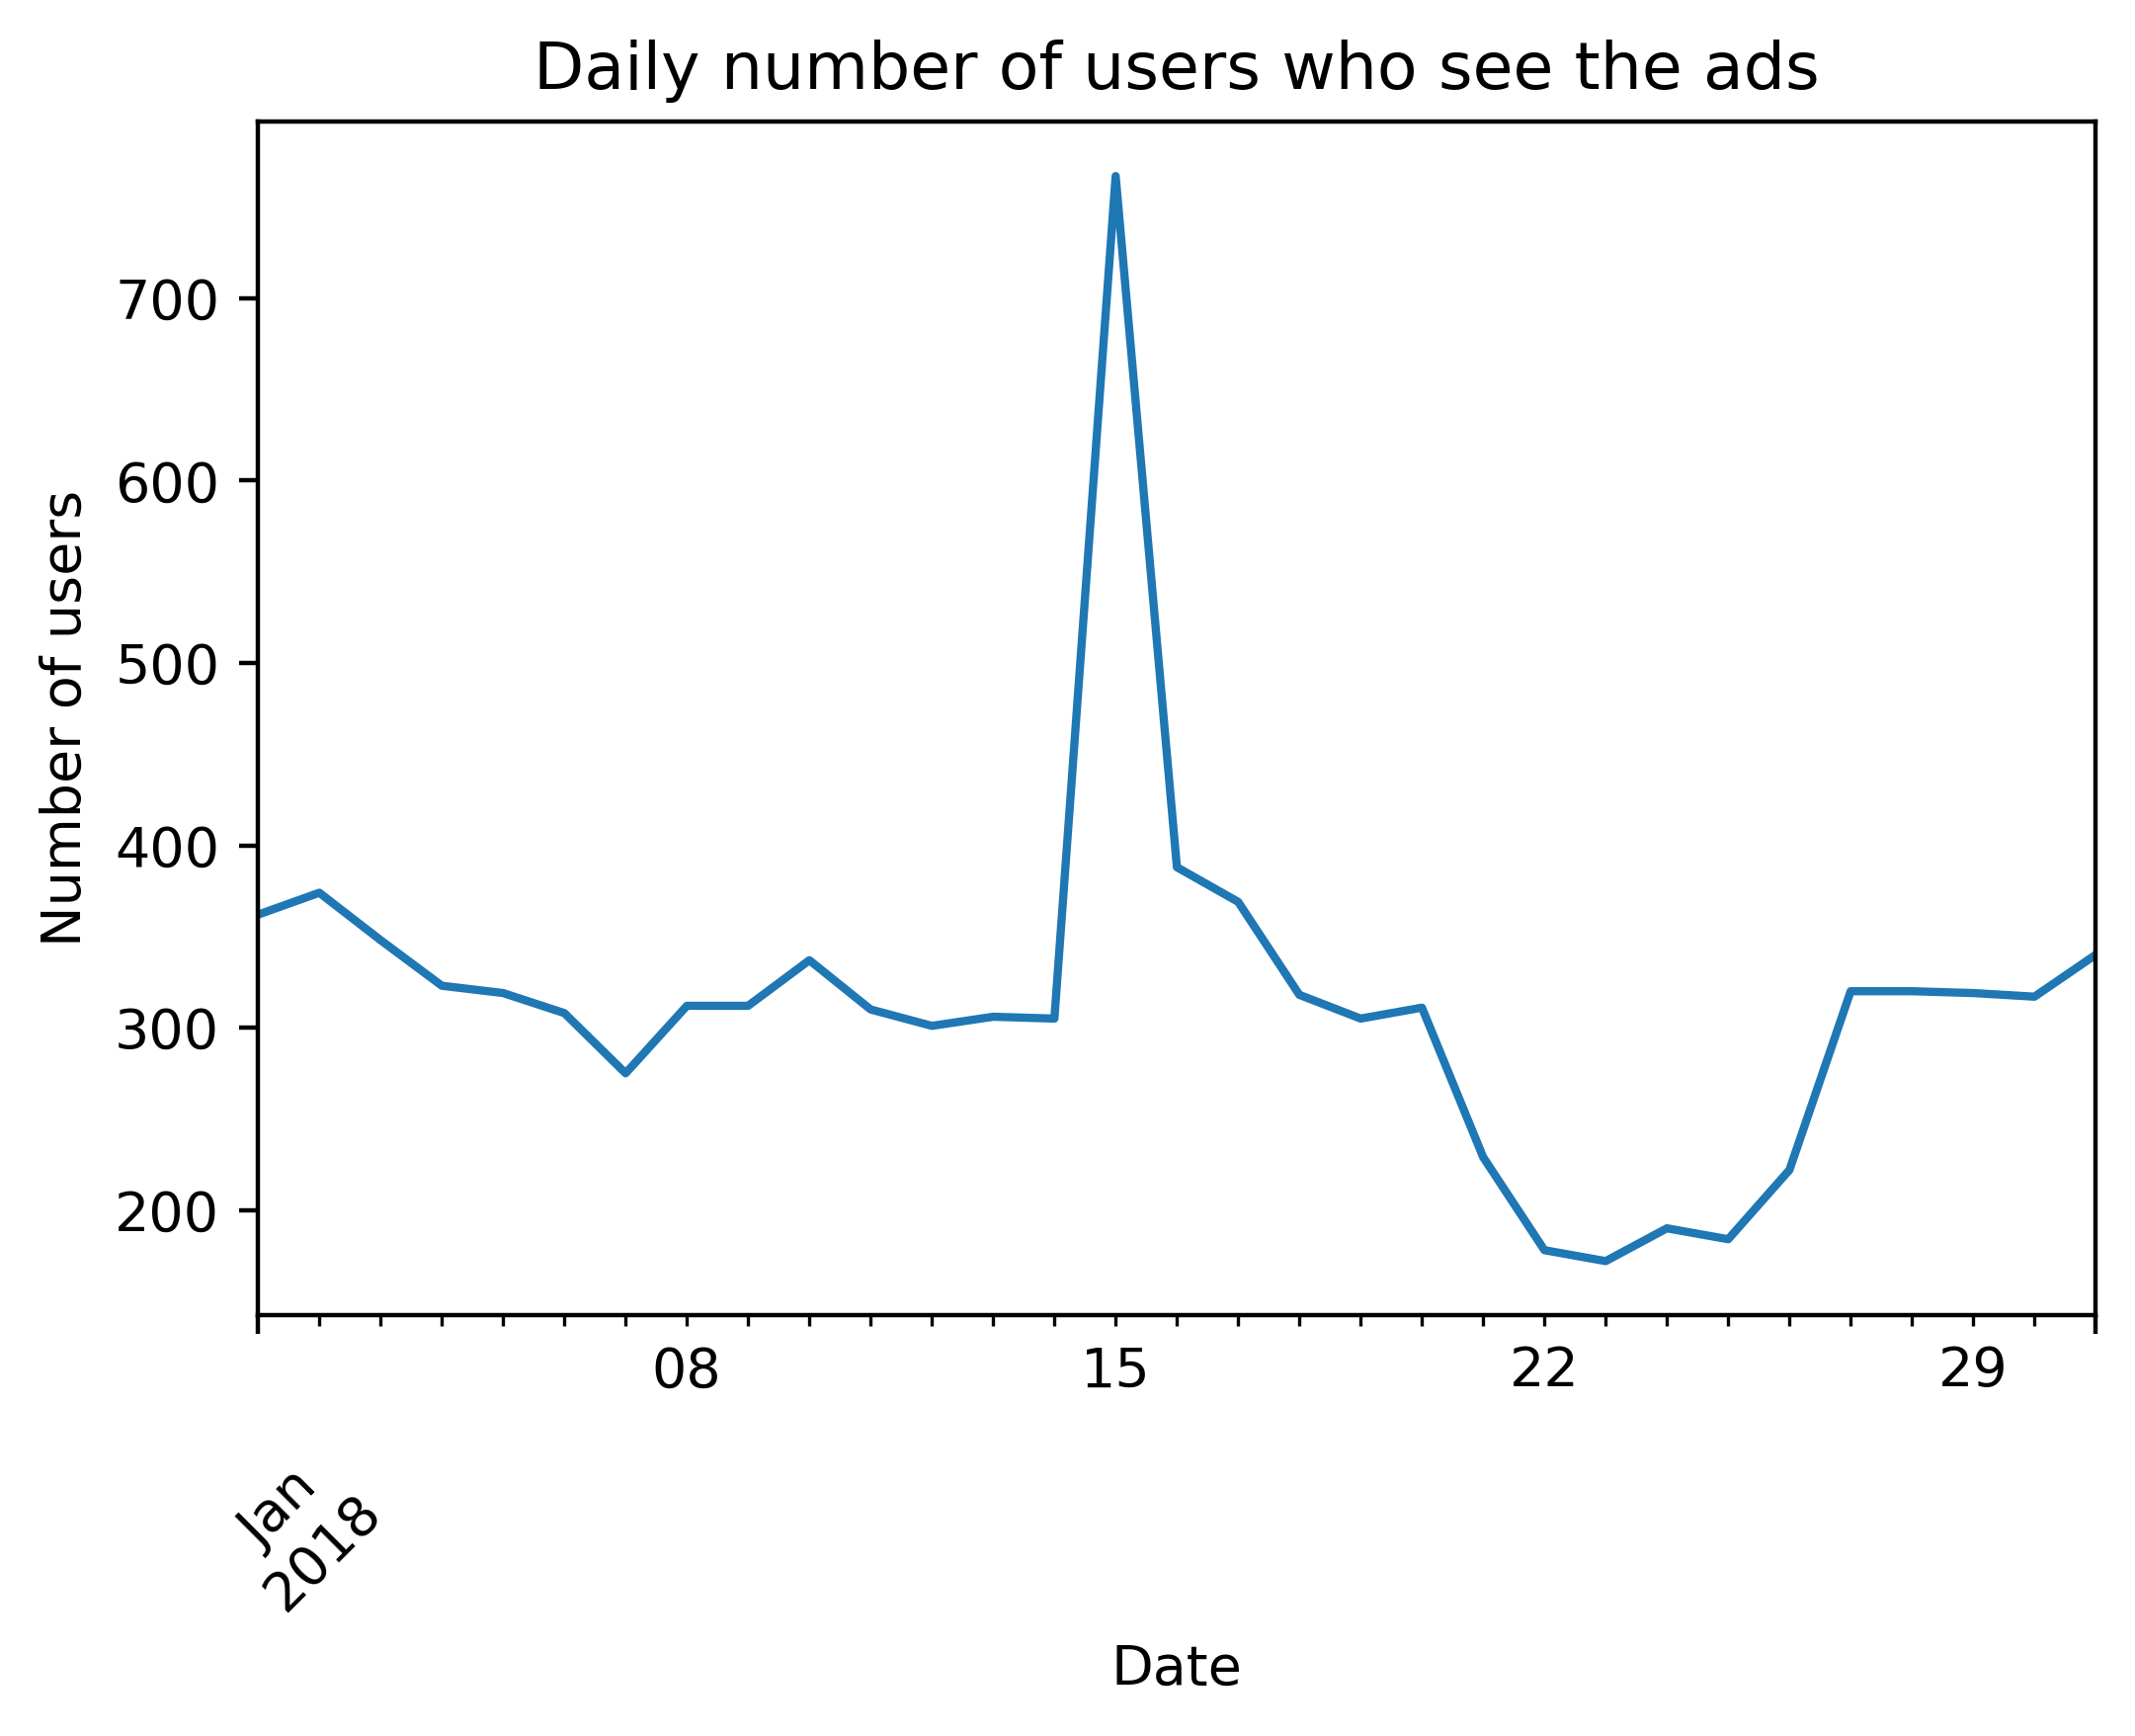

In [99]:
daily_users.plot()
plt.title('Daily number of users who see the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

In [100]:
subscribers = df[df['converted'] == True]['user_id'].nunique()
total = df['user_id'].nunique()
conv_rate = subscribers/total
print('Conversion rate of users where {:.2%}'.format(conv_rate))

Conversion rate of users where 13.89%


In [101]:
total_subscribers = df[df["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = df[df['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

686.4 %


In [121]:
df_converted = df.loc[df['converted'] ==True]

In [123]:
retained = df_converted[df_converted['is_retained'] == True]['user_id'].nunique()
subscribers = df[df['converted'] == True]['user_id'].nunique()

ret_rate = retained/subscribers
print('Retention rate of users where {:.2%}'.format(ret_rate))

Retention rate of users where 67.09%


In [130]:
retained_bygroup = df[df['is_retained'] == True]\
                   .groupby(['subscribing_channel'])\
                    ['user_id'].nunique()
retained_bygroup

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [131]:
subscribers_bygroup = df[df['converted'] == True]\
                .groupby(['subscribing_channel'])\
                ['user_id'].nunique()
subscribers_bygroup

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [129]:
channel_retention_rate = (retained_bygroup/subscribers_bygroup)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


Text(0, 0.5, 'Conversion rate (%)')

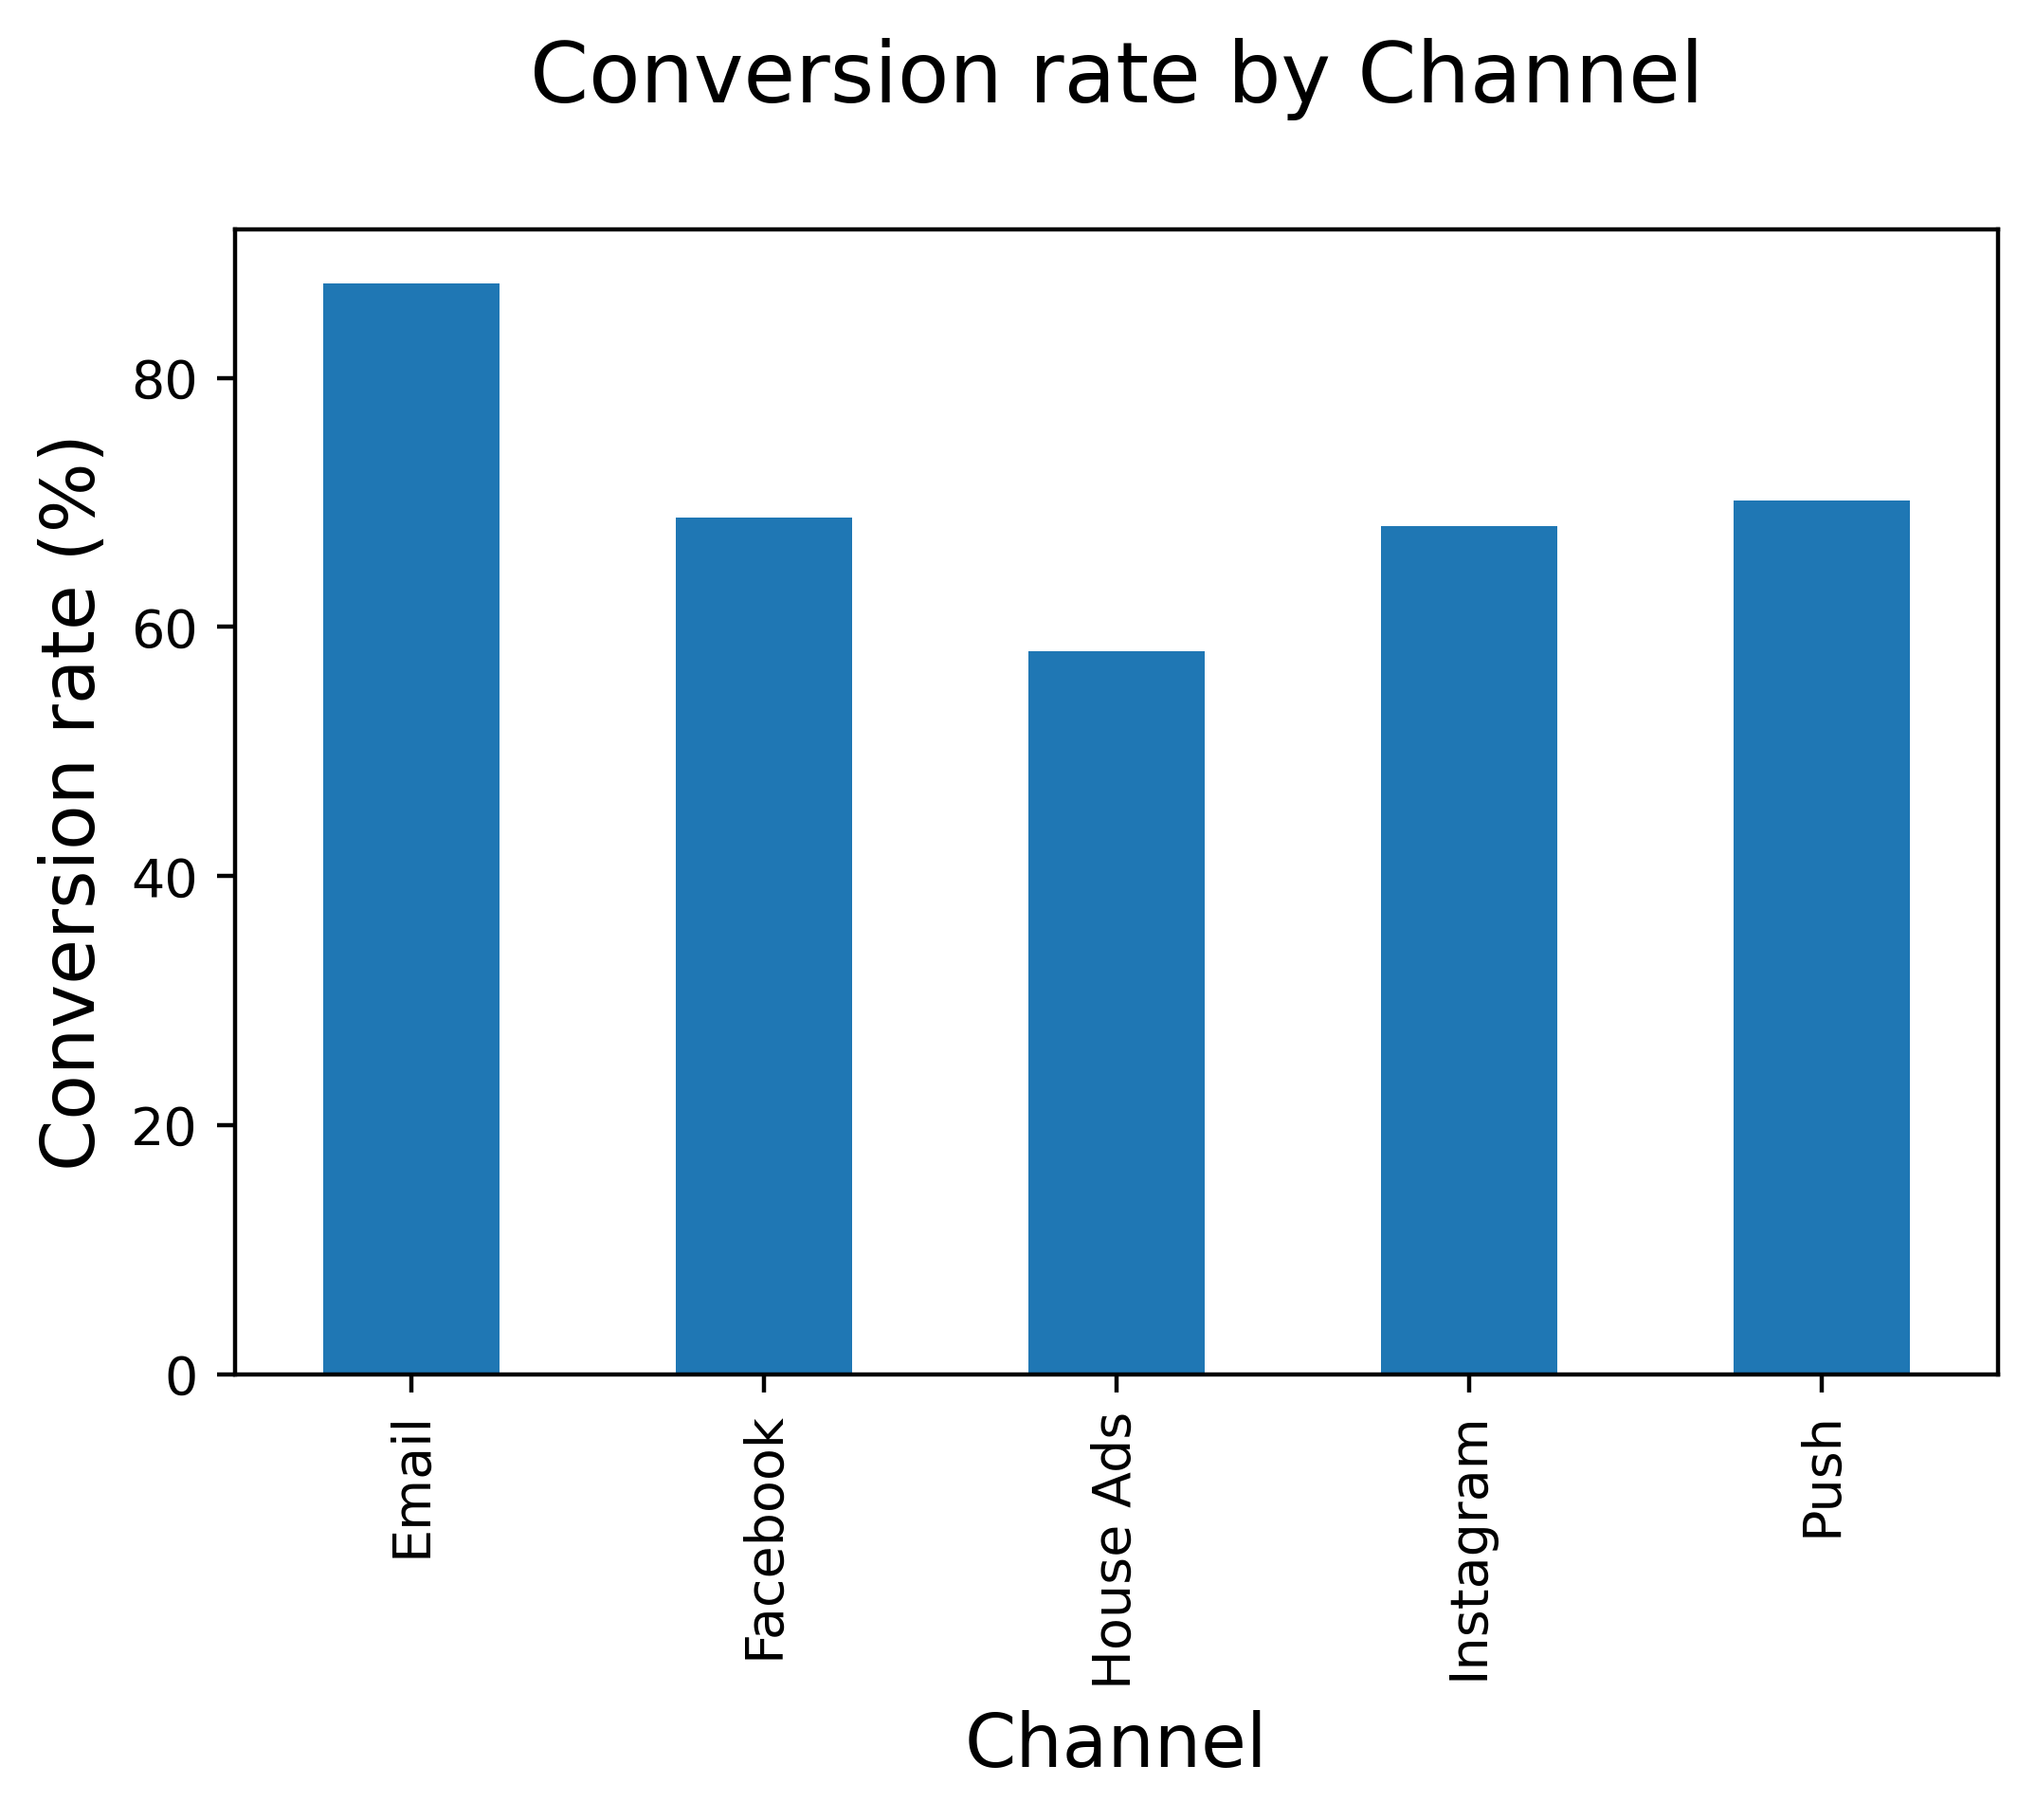

In [142]:
channel_retention_rate.plot(kind='bar')
plt.title('Conversion rate by Channel\n', size=16)
plt.xlabel('Channel', size=14)
plt.ylabel('Conversion rate (%)', size=14)

In [194]:
english_speakers = df[df['language_displayed'] == 'English']
total = english_speakers['user_id'].nunique()
english_subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()
conversion_rate = english_subscribers/total
print('English speaker conversion rate: {:.2%}'.format(conversion_rate))

English speaker conversion rate: 12.92%


In [195]:
total = df.groupby(['language_displayed'])['user_id'].nunique()
subscribers = df[df['converted']==True].\
groupby(['language_displayed'])\
['user_id'].nunique()

In [196]:
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


Text(0, 0.5, 'Conversion rate (%)')

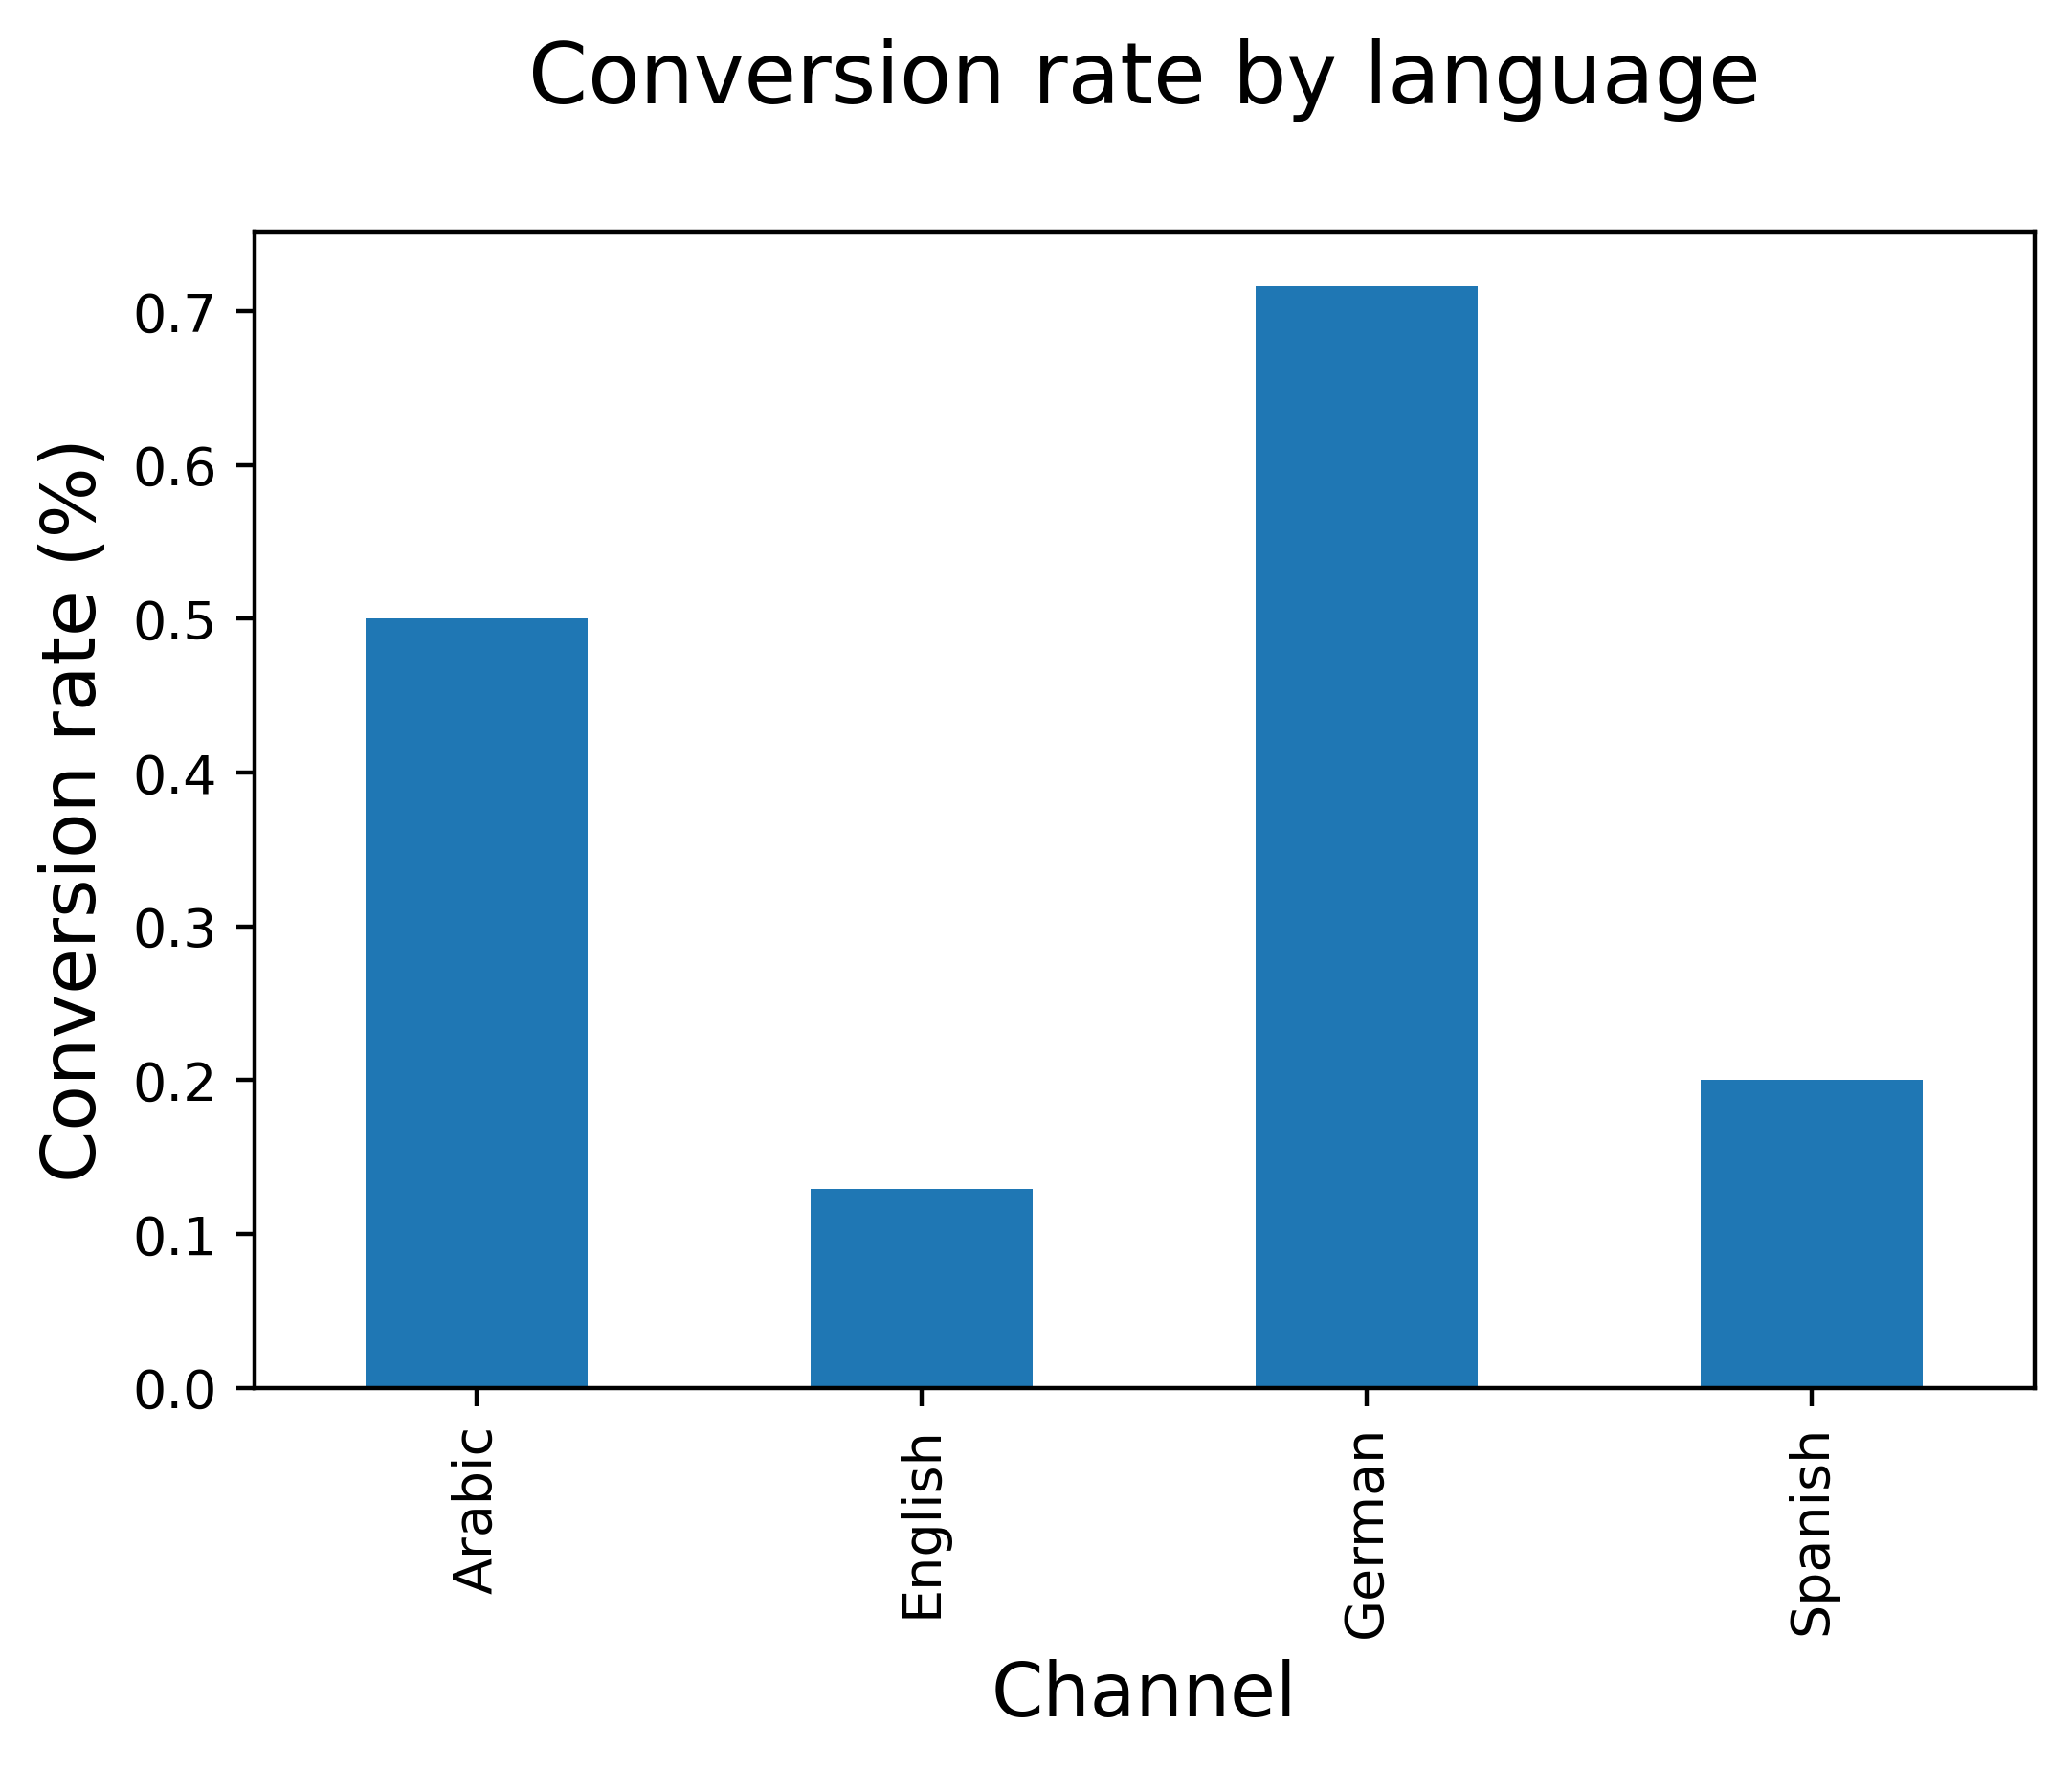

In [197]:
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate by language\n', size=16)
plt.xlabel('Channel', size=14)
plt.ylabel('Conversion rate (%)', size=14)

In [198]:
total = df.groupby(['date_subscribed'])['user_id'].nunique()
retained = df[df['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()
daily_ret_rate = retained/total

In [199]:
daily_ret_rate = pd.DataFrame(daily_ret_rate.reset_index(0))
daily_ret_rate.columns = ['date_subscribed', 'retention_rate']
daily_ret_rate.head()

,date_subscribed,retention_rate
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730
3,2018-01-04,0.500000
4,2018-01-05,0.575000


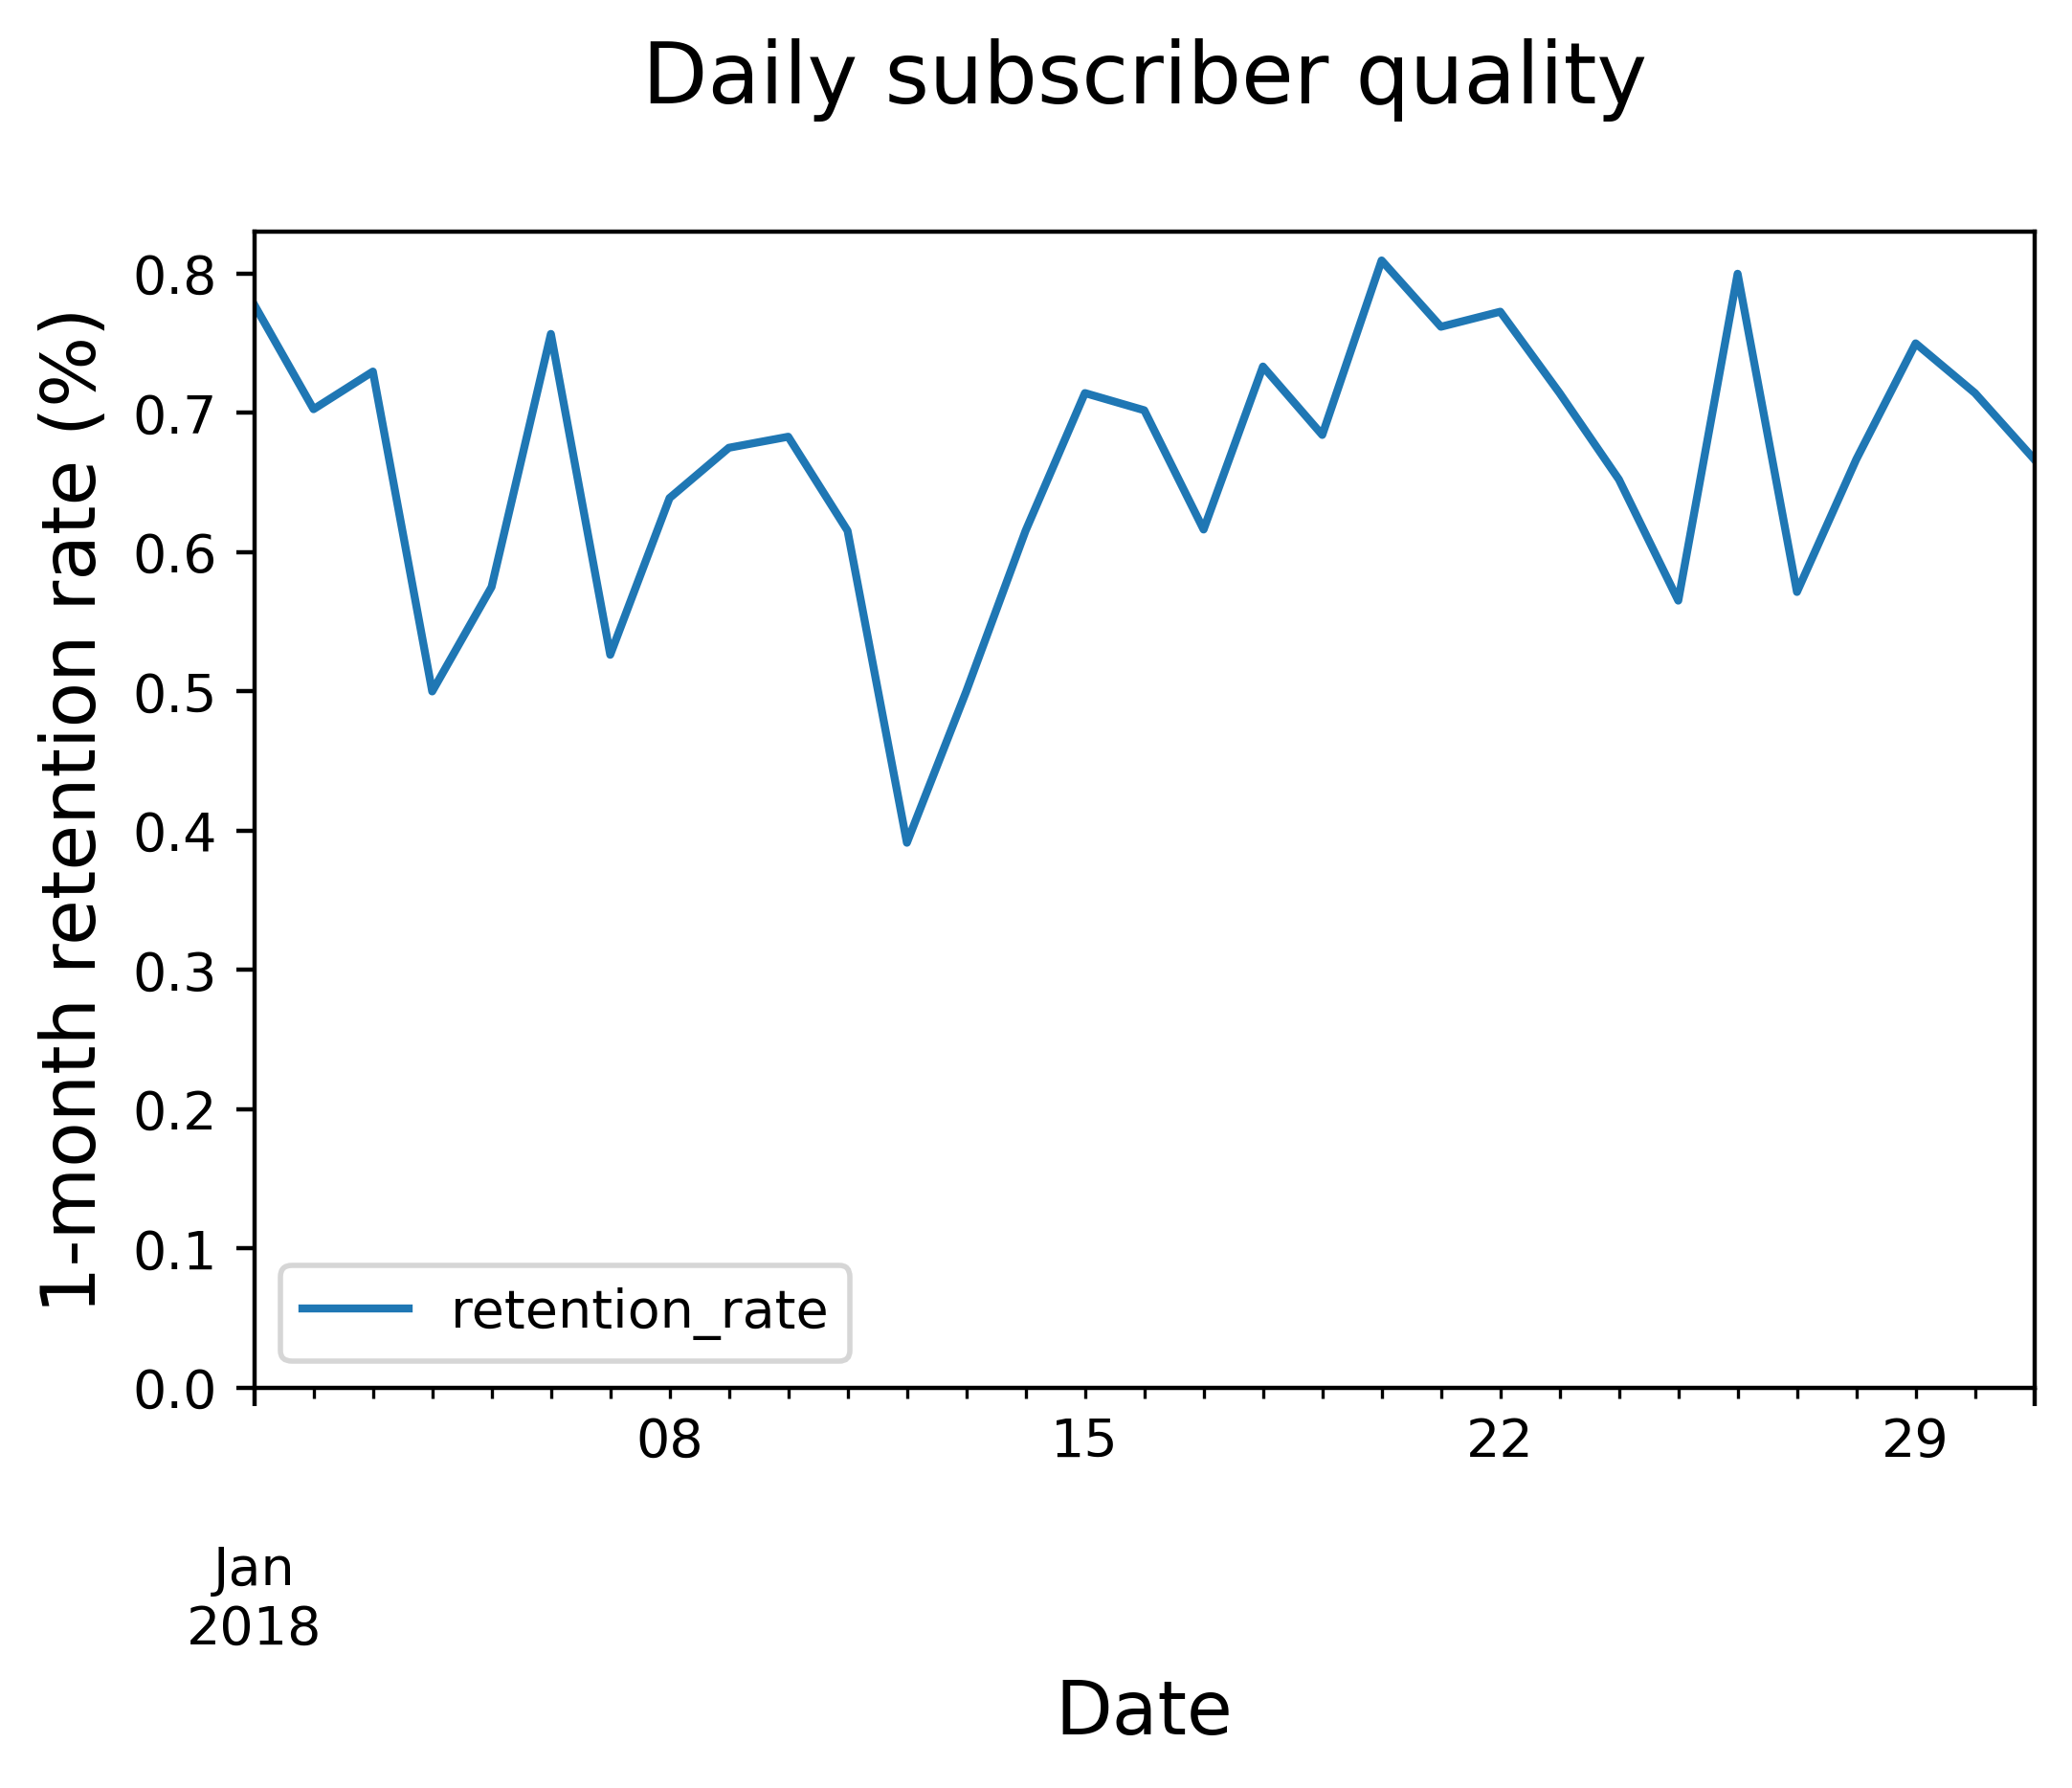

In [200]:
daily_ret_rate.plot('date_subscribed', 'retention_rate')
plt.title('Daily subscriber quality\n', size=16)
plt.xlabel('Date', size=14)
plt.ylabel('1-month retention rate (%)', size=14)
plt.ylim(0)
plt.show()

In [215]:
total = df.groupby(['date_served'])['user_id']\
                     .nunique()

subscribers = df[df['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

daily_conversion_rate = subscribers/total

In [216]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

daily_conversion_rate.columns = ['date_subscribed', 
                                 'conversion_rate']

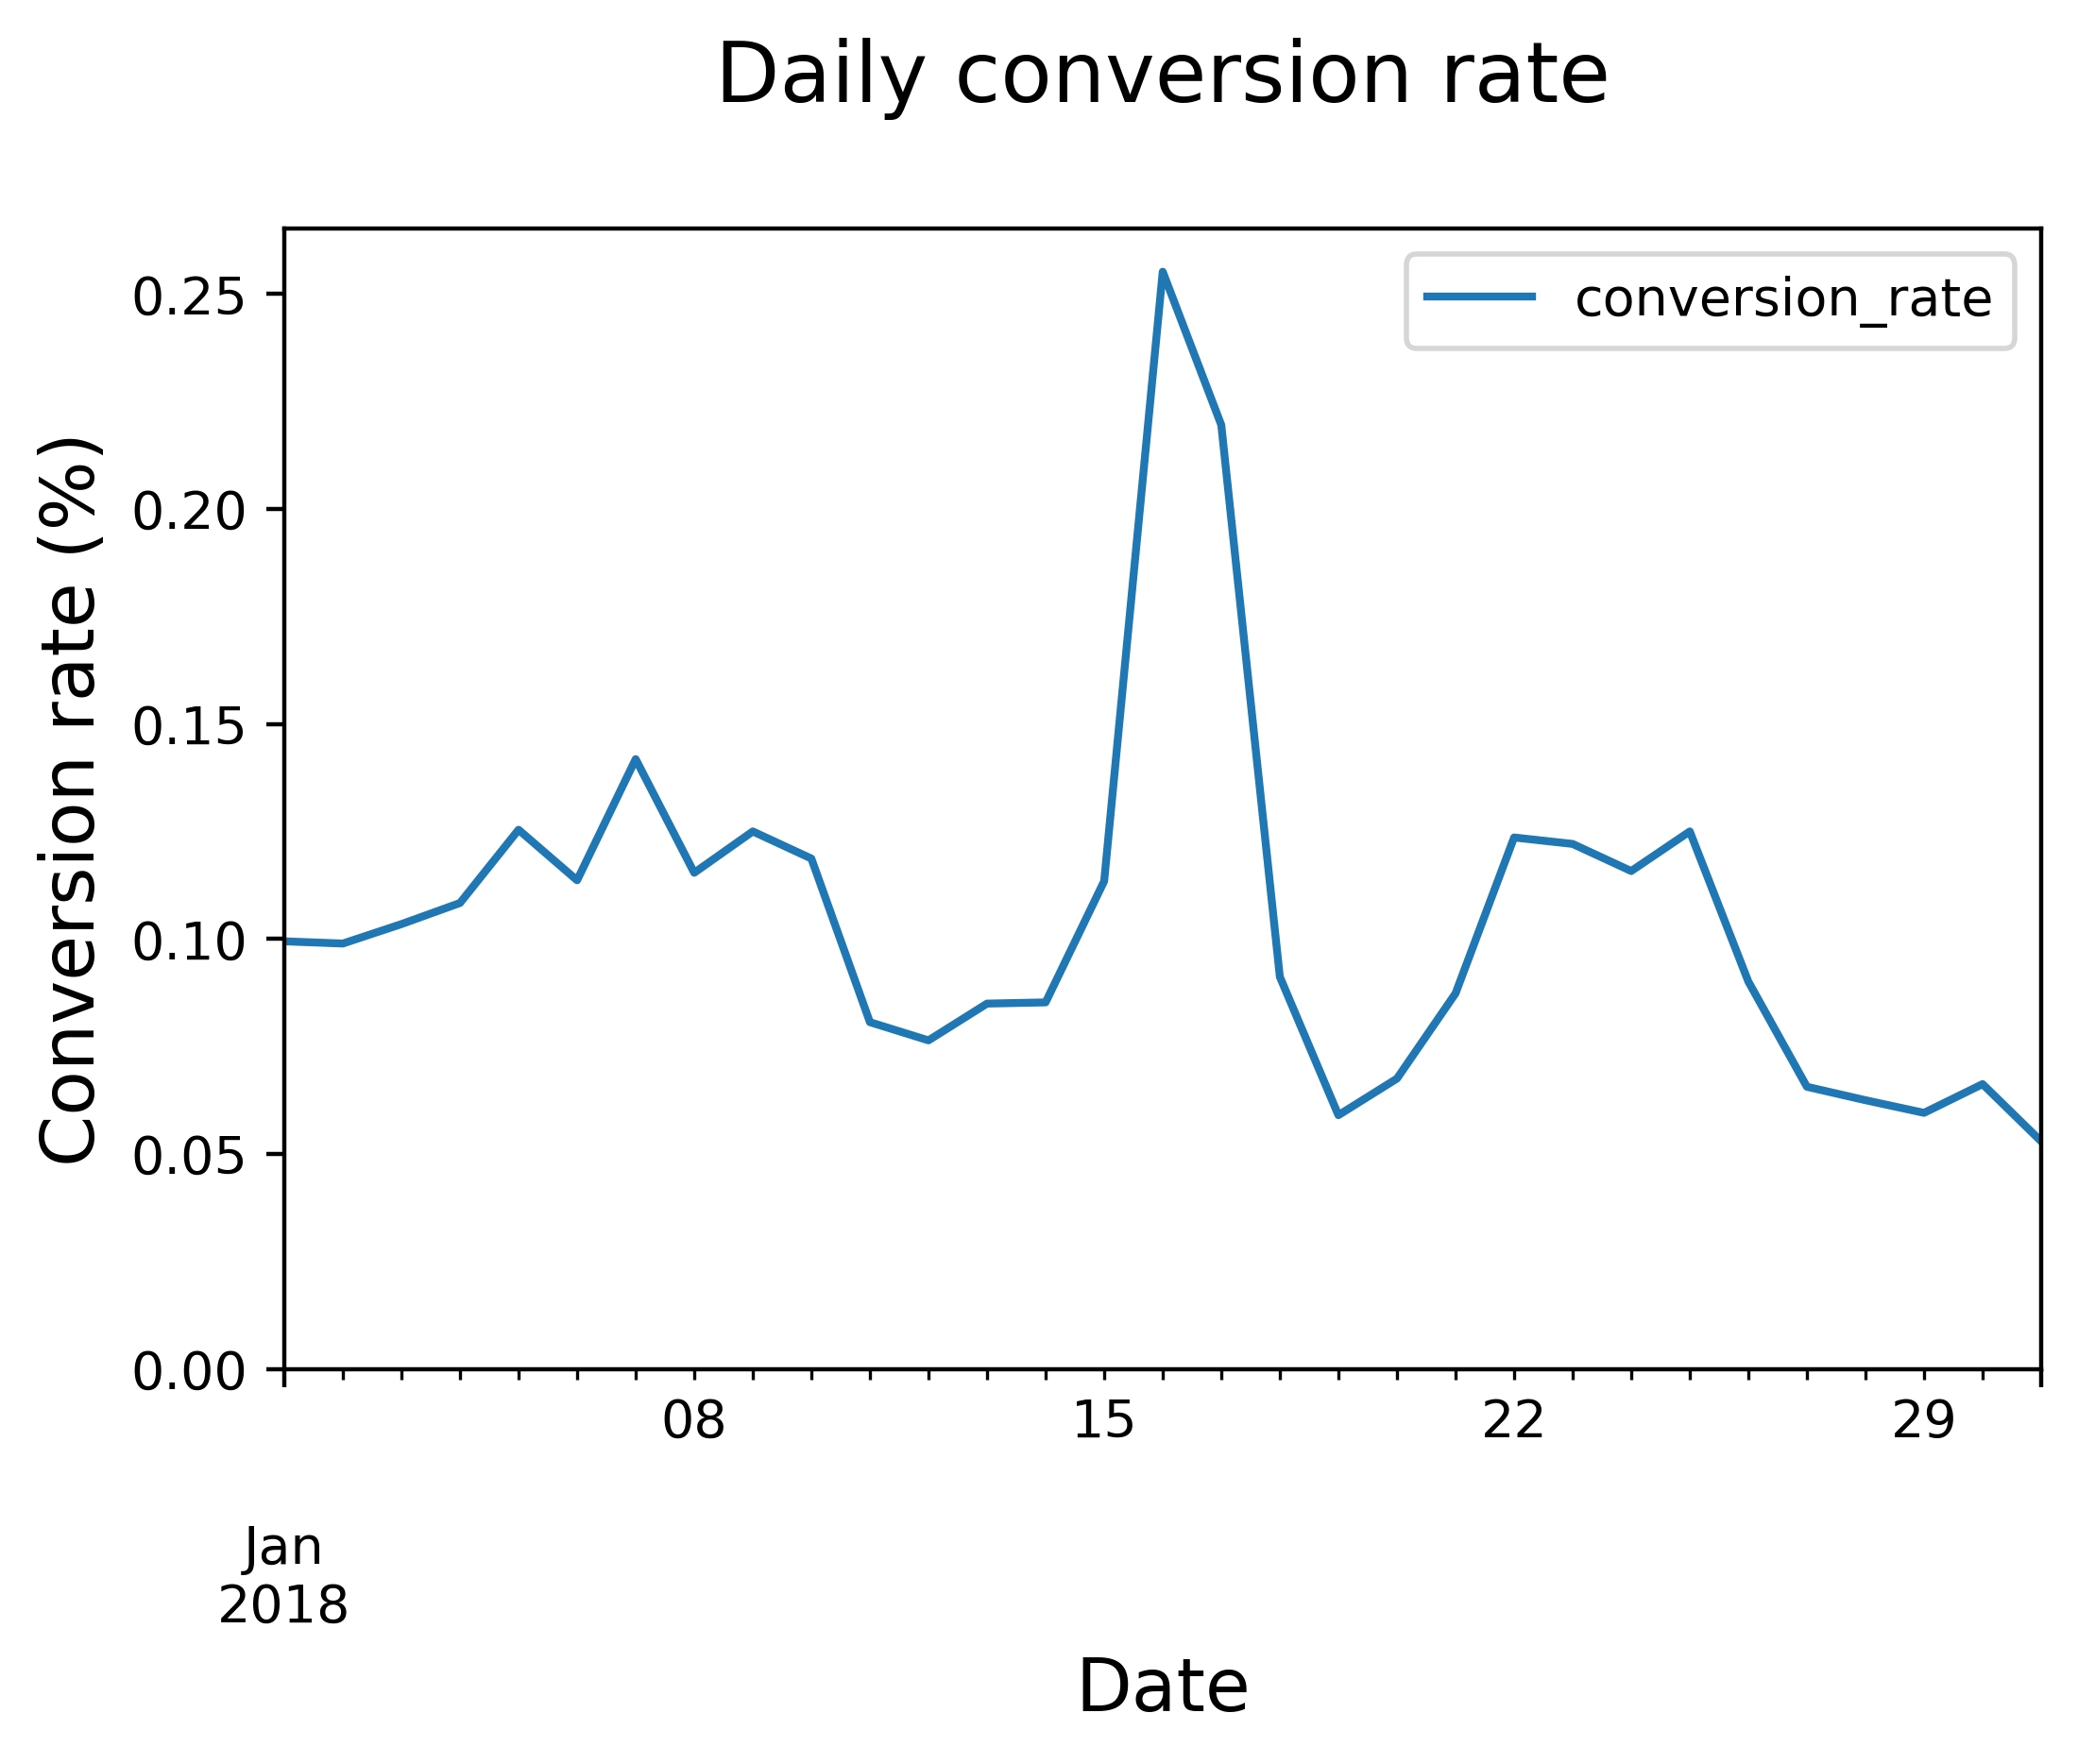

In [217]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_subscribed', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

In [222]:
language = df.groupby(['date_served', 'language_preferred'])\
                    ['user_id'].count()
language

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               317
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64

In [223]:
language = pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


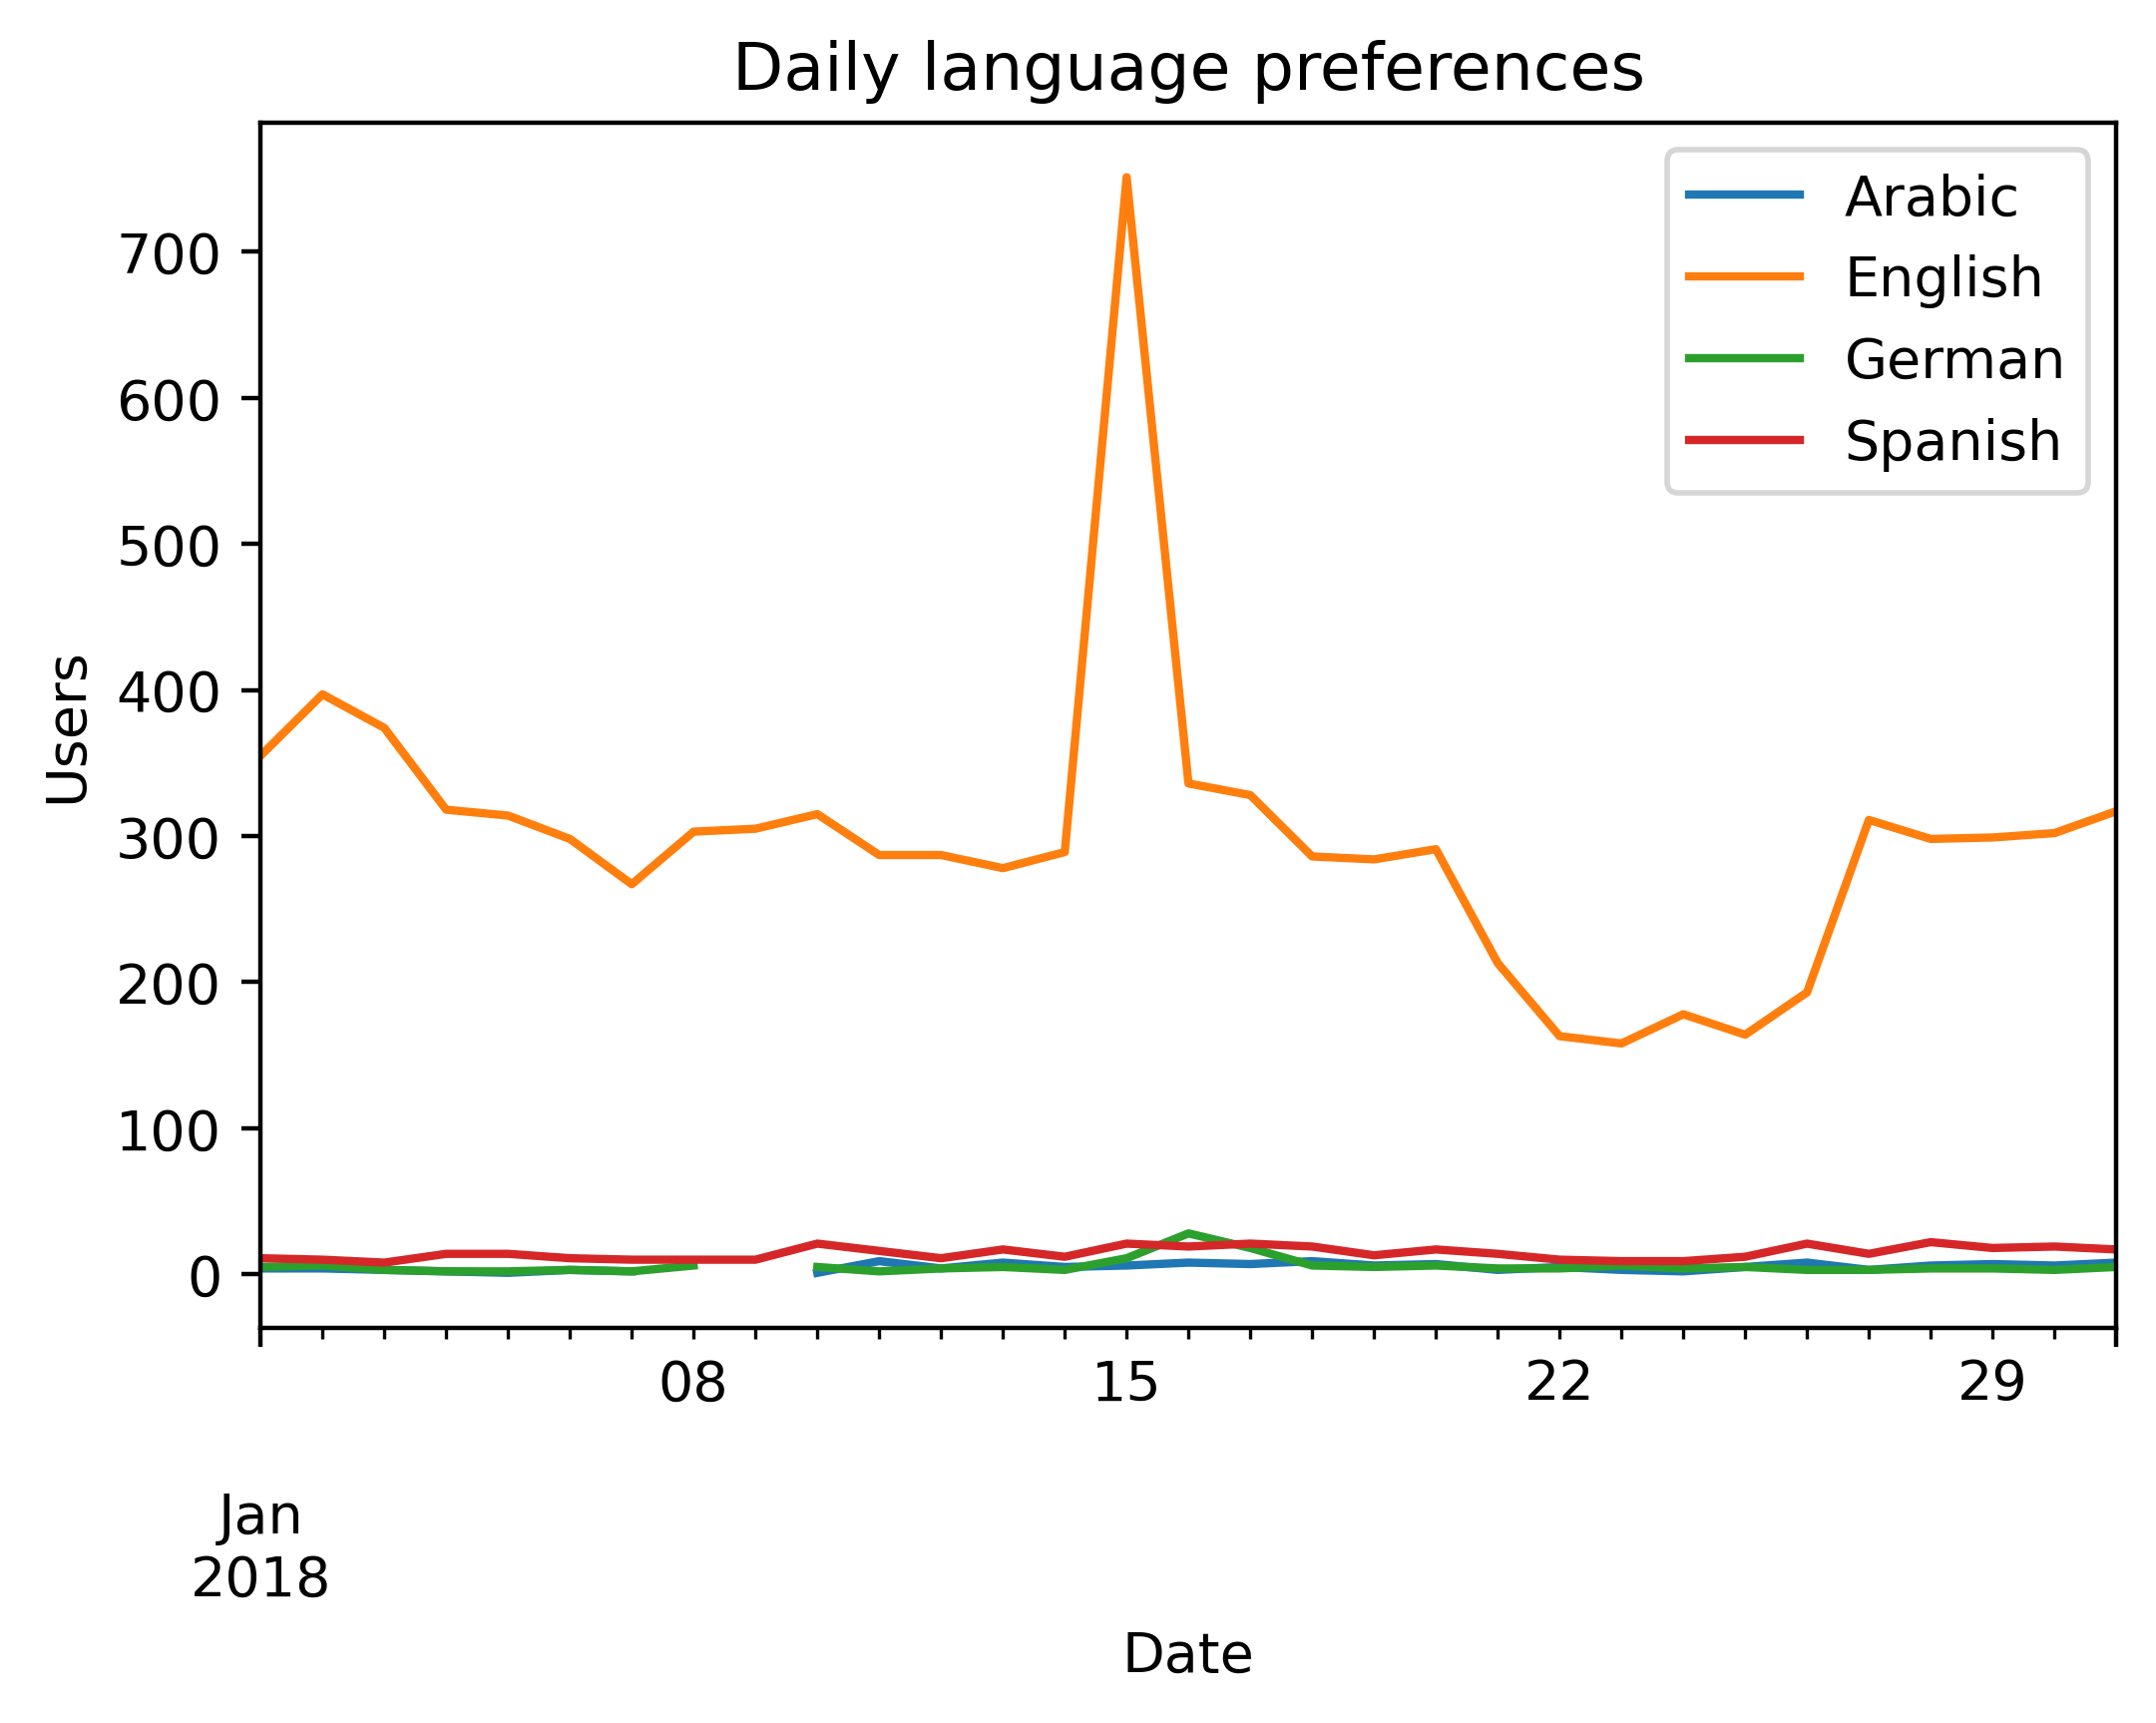

In [226]:
language.plot(kind = 'line')
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right', 
           labels = language.columns.values)
plt.show()

In [218]:
channel_age = df.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()
channel_age

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [219]:
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


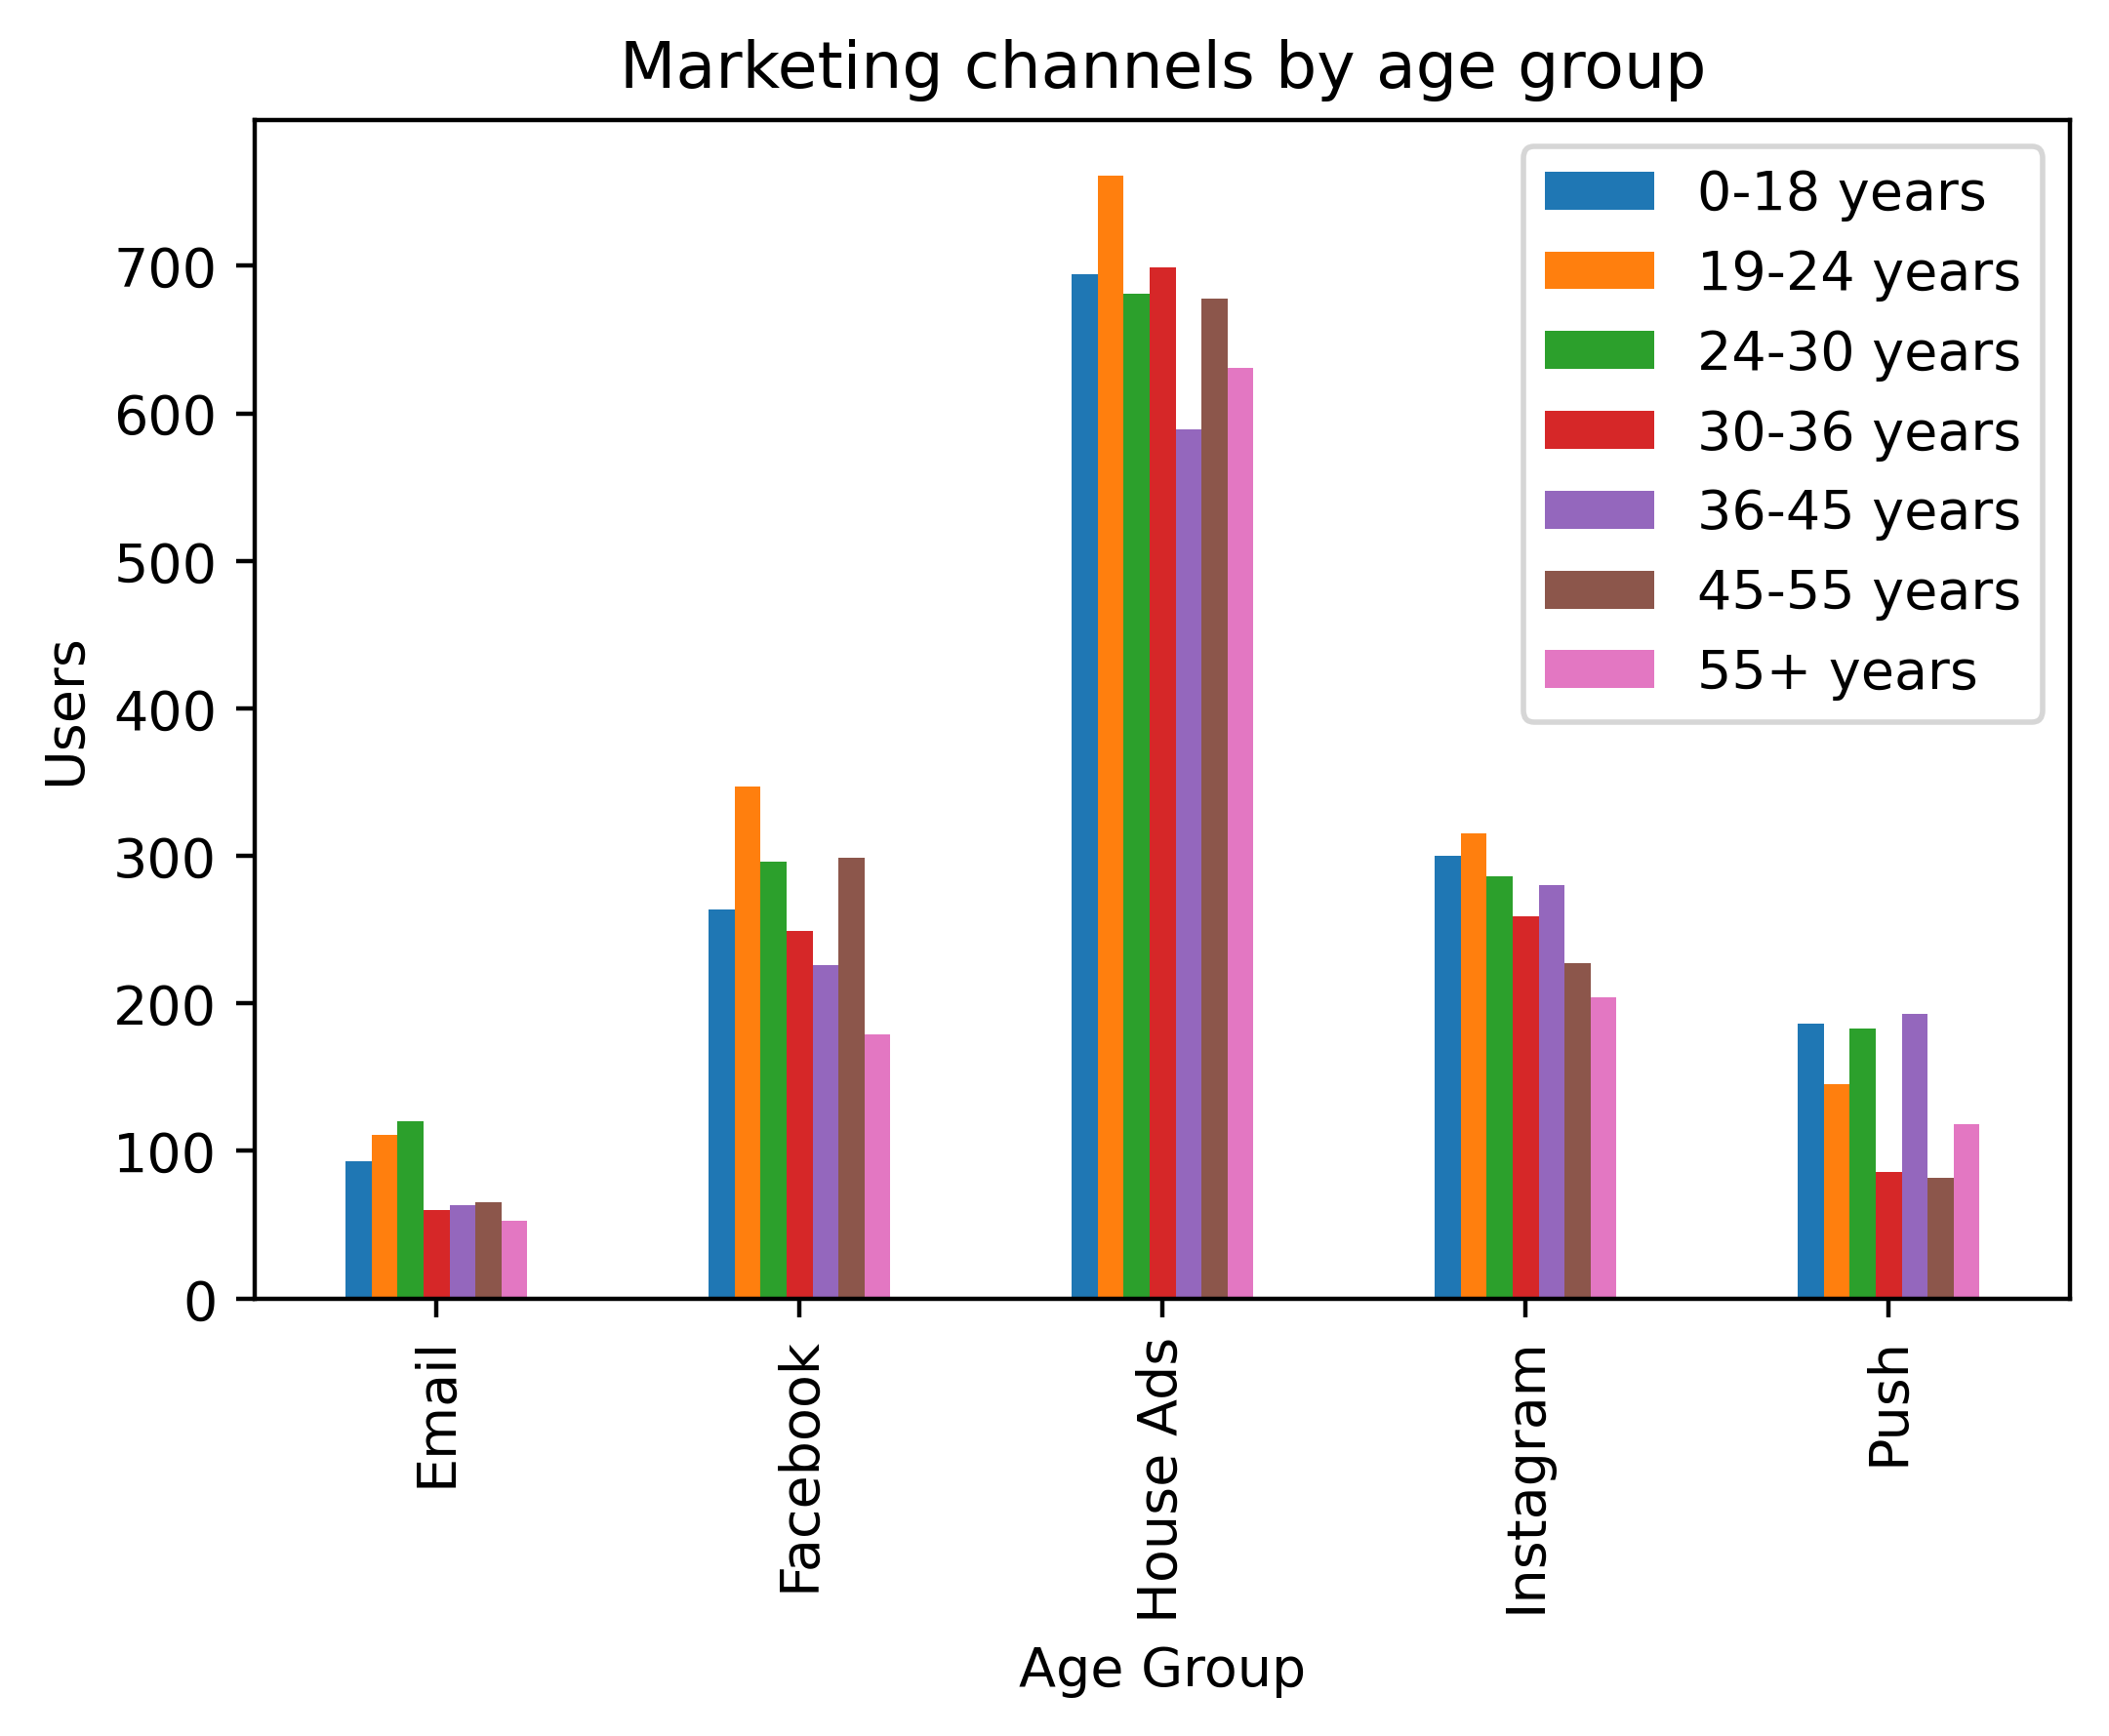

In [220]:
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [231]:
retention_total = df.groupby(['date_subscribed','subscribing_channel'])\
                            ['user_id'].nunique()

print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [234]:
retention_subs = df[df['is_retained'] == True].groupby(\
                ['date_subscribed','subscribing_channel'])\
                ['user_id'].nunique()

print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


In [236]:
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))
retention_rate_df

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.000000,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.750000,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.500000,0.666667,0.466667,0.500000,NaN
2018-01-05,1.000000,0.571429,0.500000,0.636364,1.000000
2018-01-06,0.800000,0.571429,0.941176,0.500000,0.500000
2018-01-07,0.500000,0.750000,0.526316,0.400000,0.666667
2018-01-08,NaN,0.888889,0.500000,0.625000,1.000000
2018-01-09,0.500000,0.285714,0.850000,0.666667,0.500000


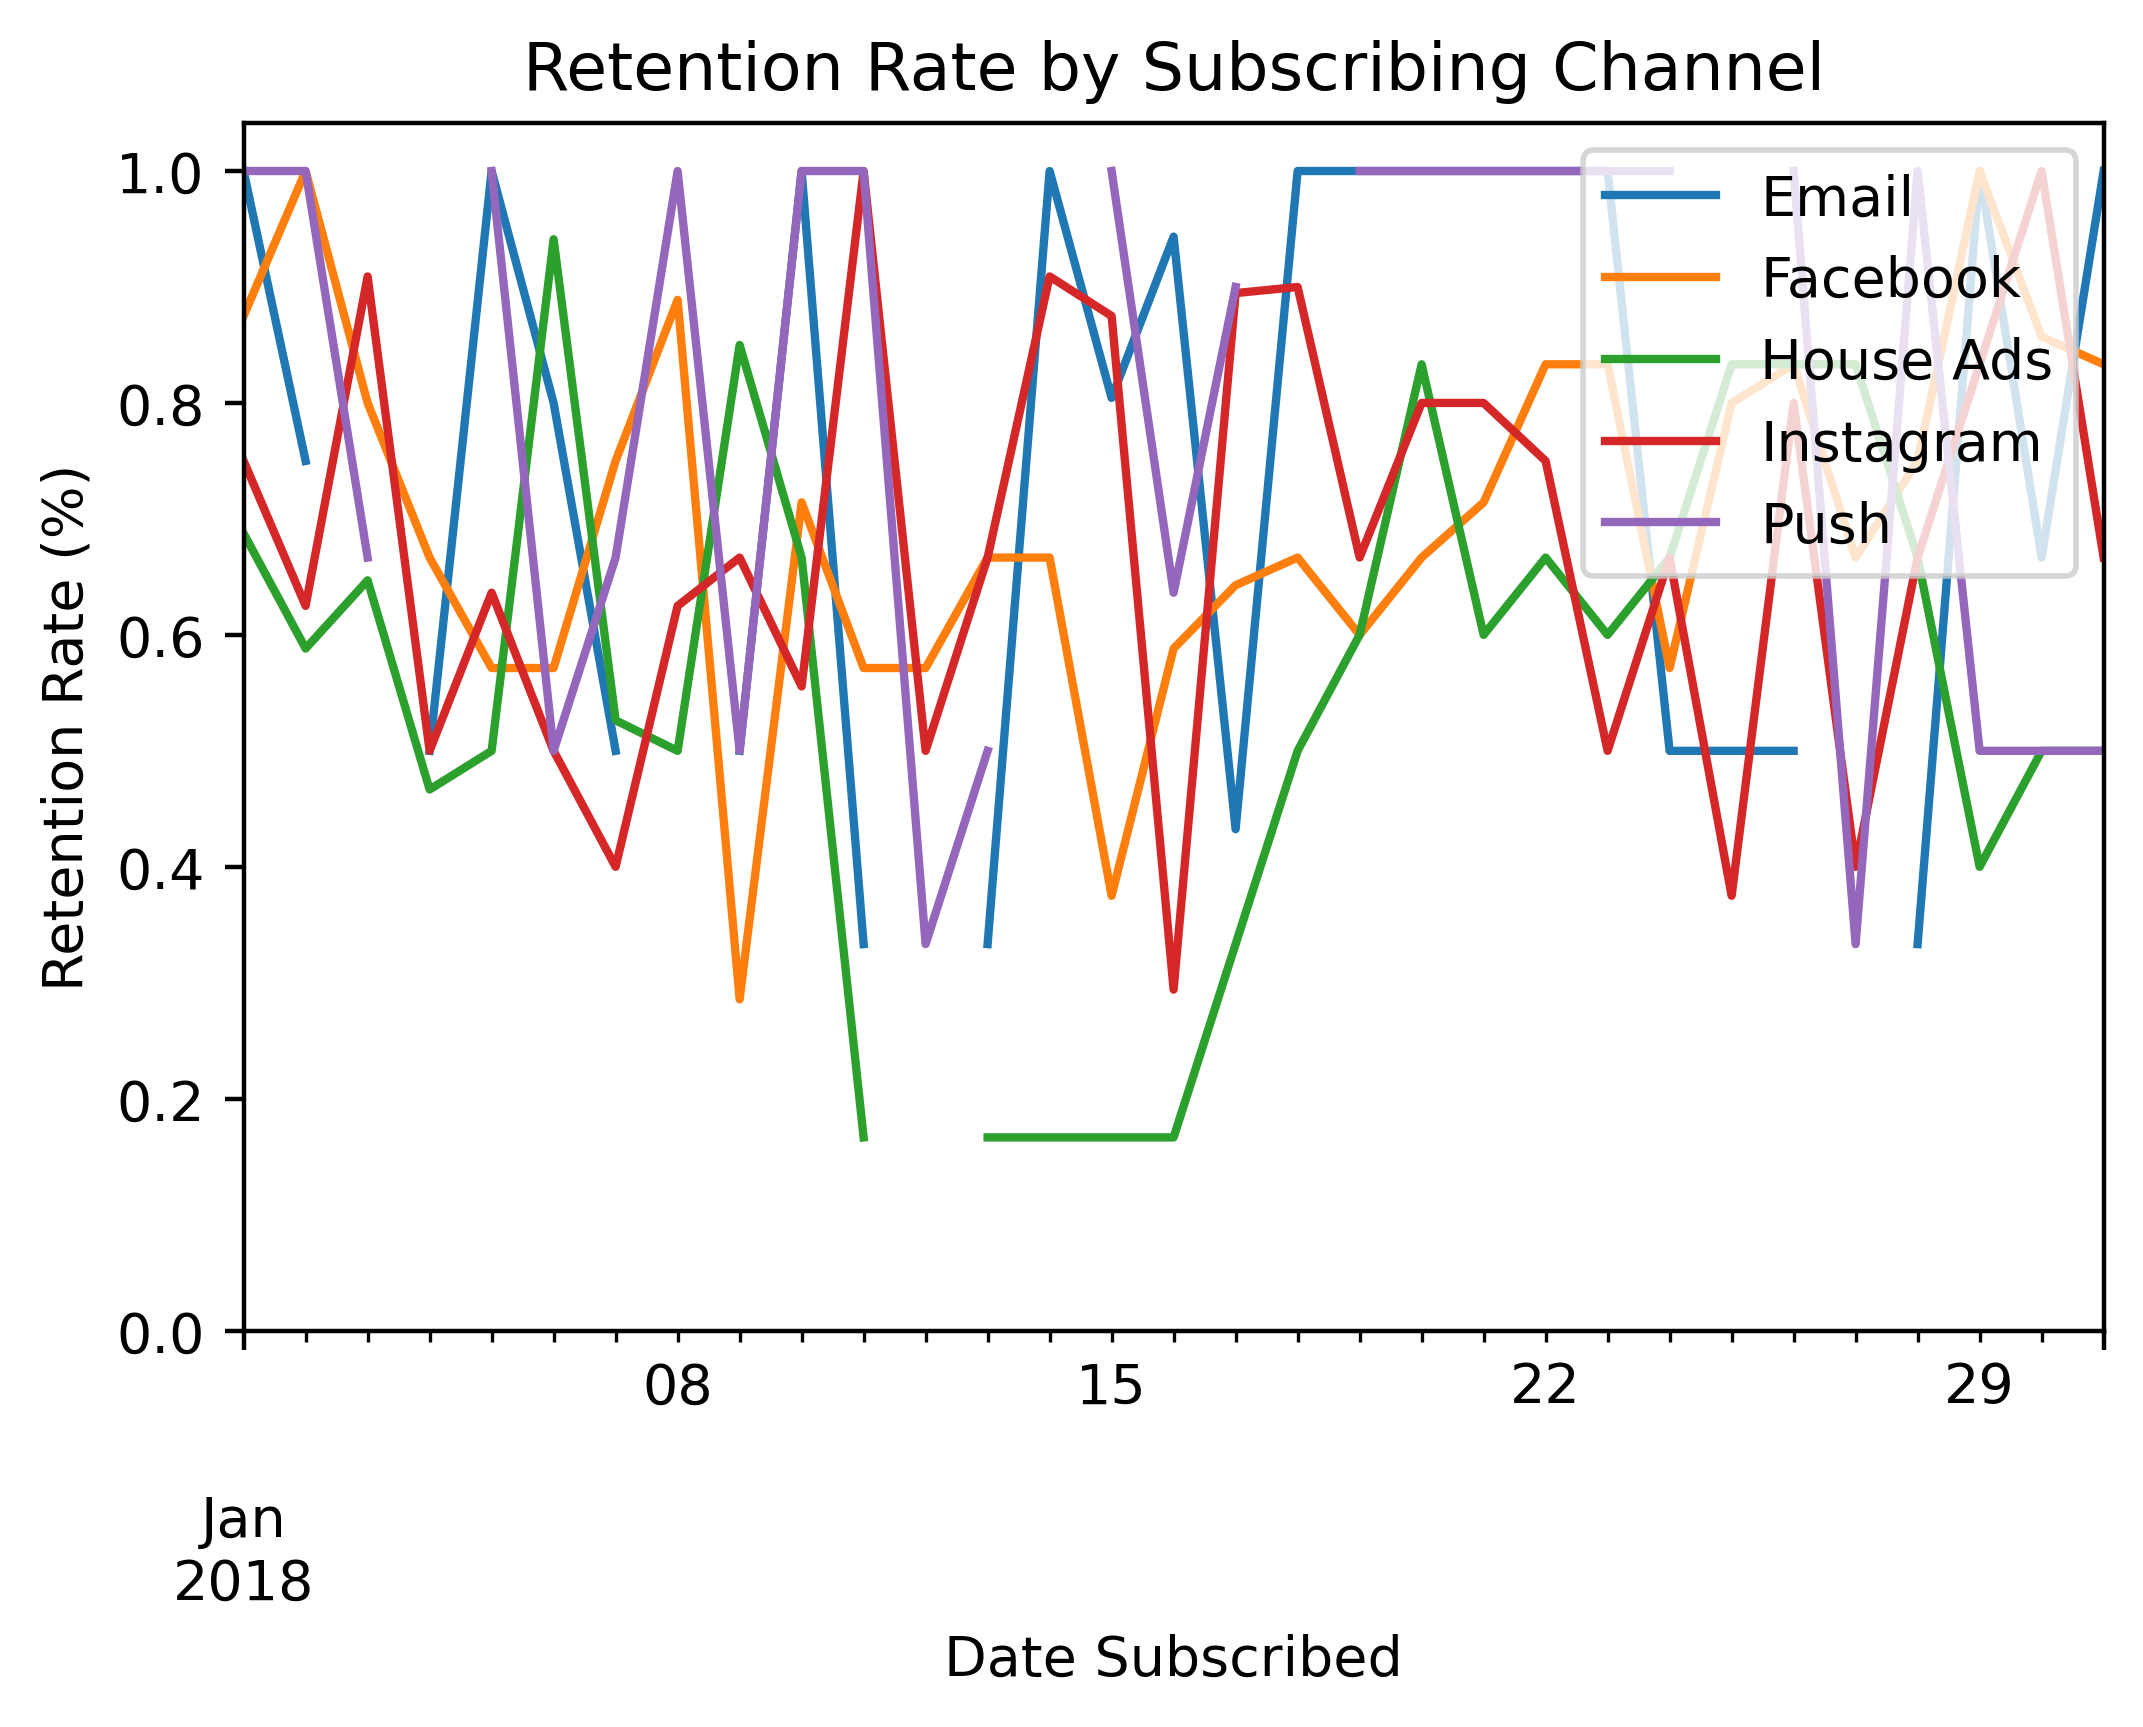

In [237]:
retention_rate_df.plot()

plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.ylim(0)
plt.show()

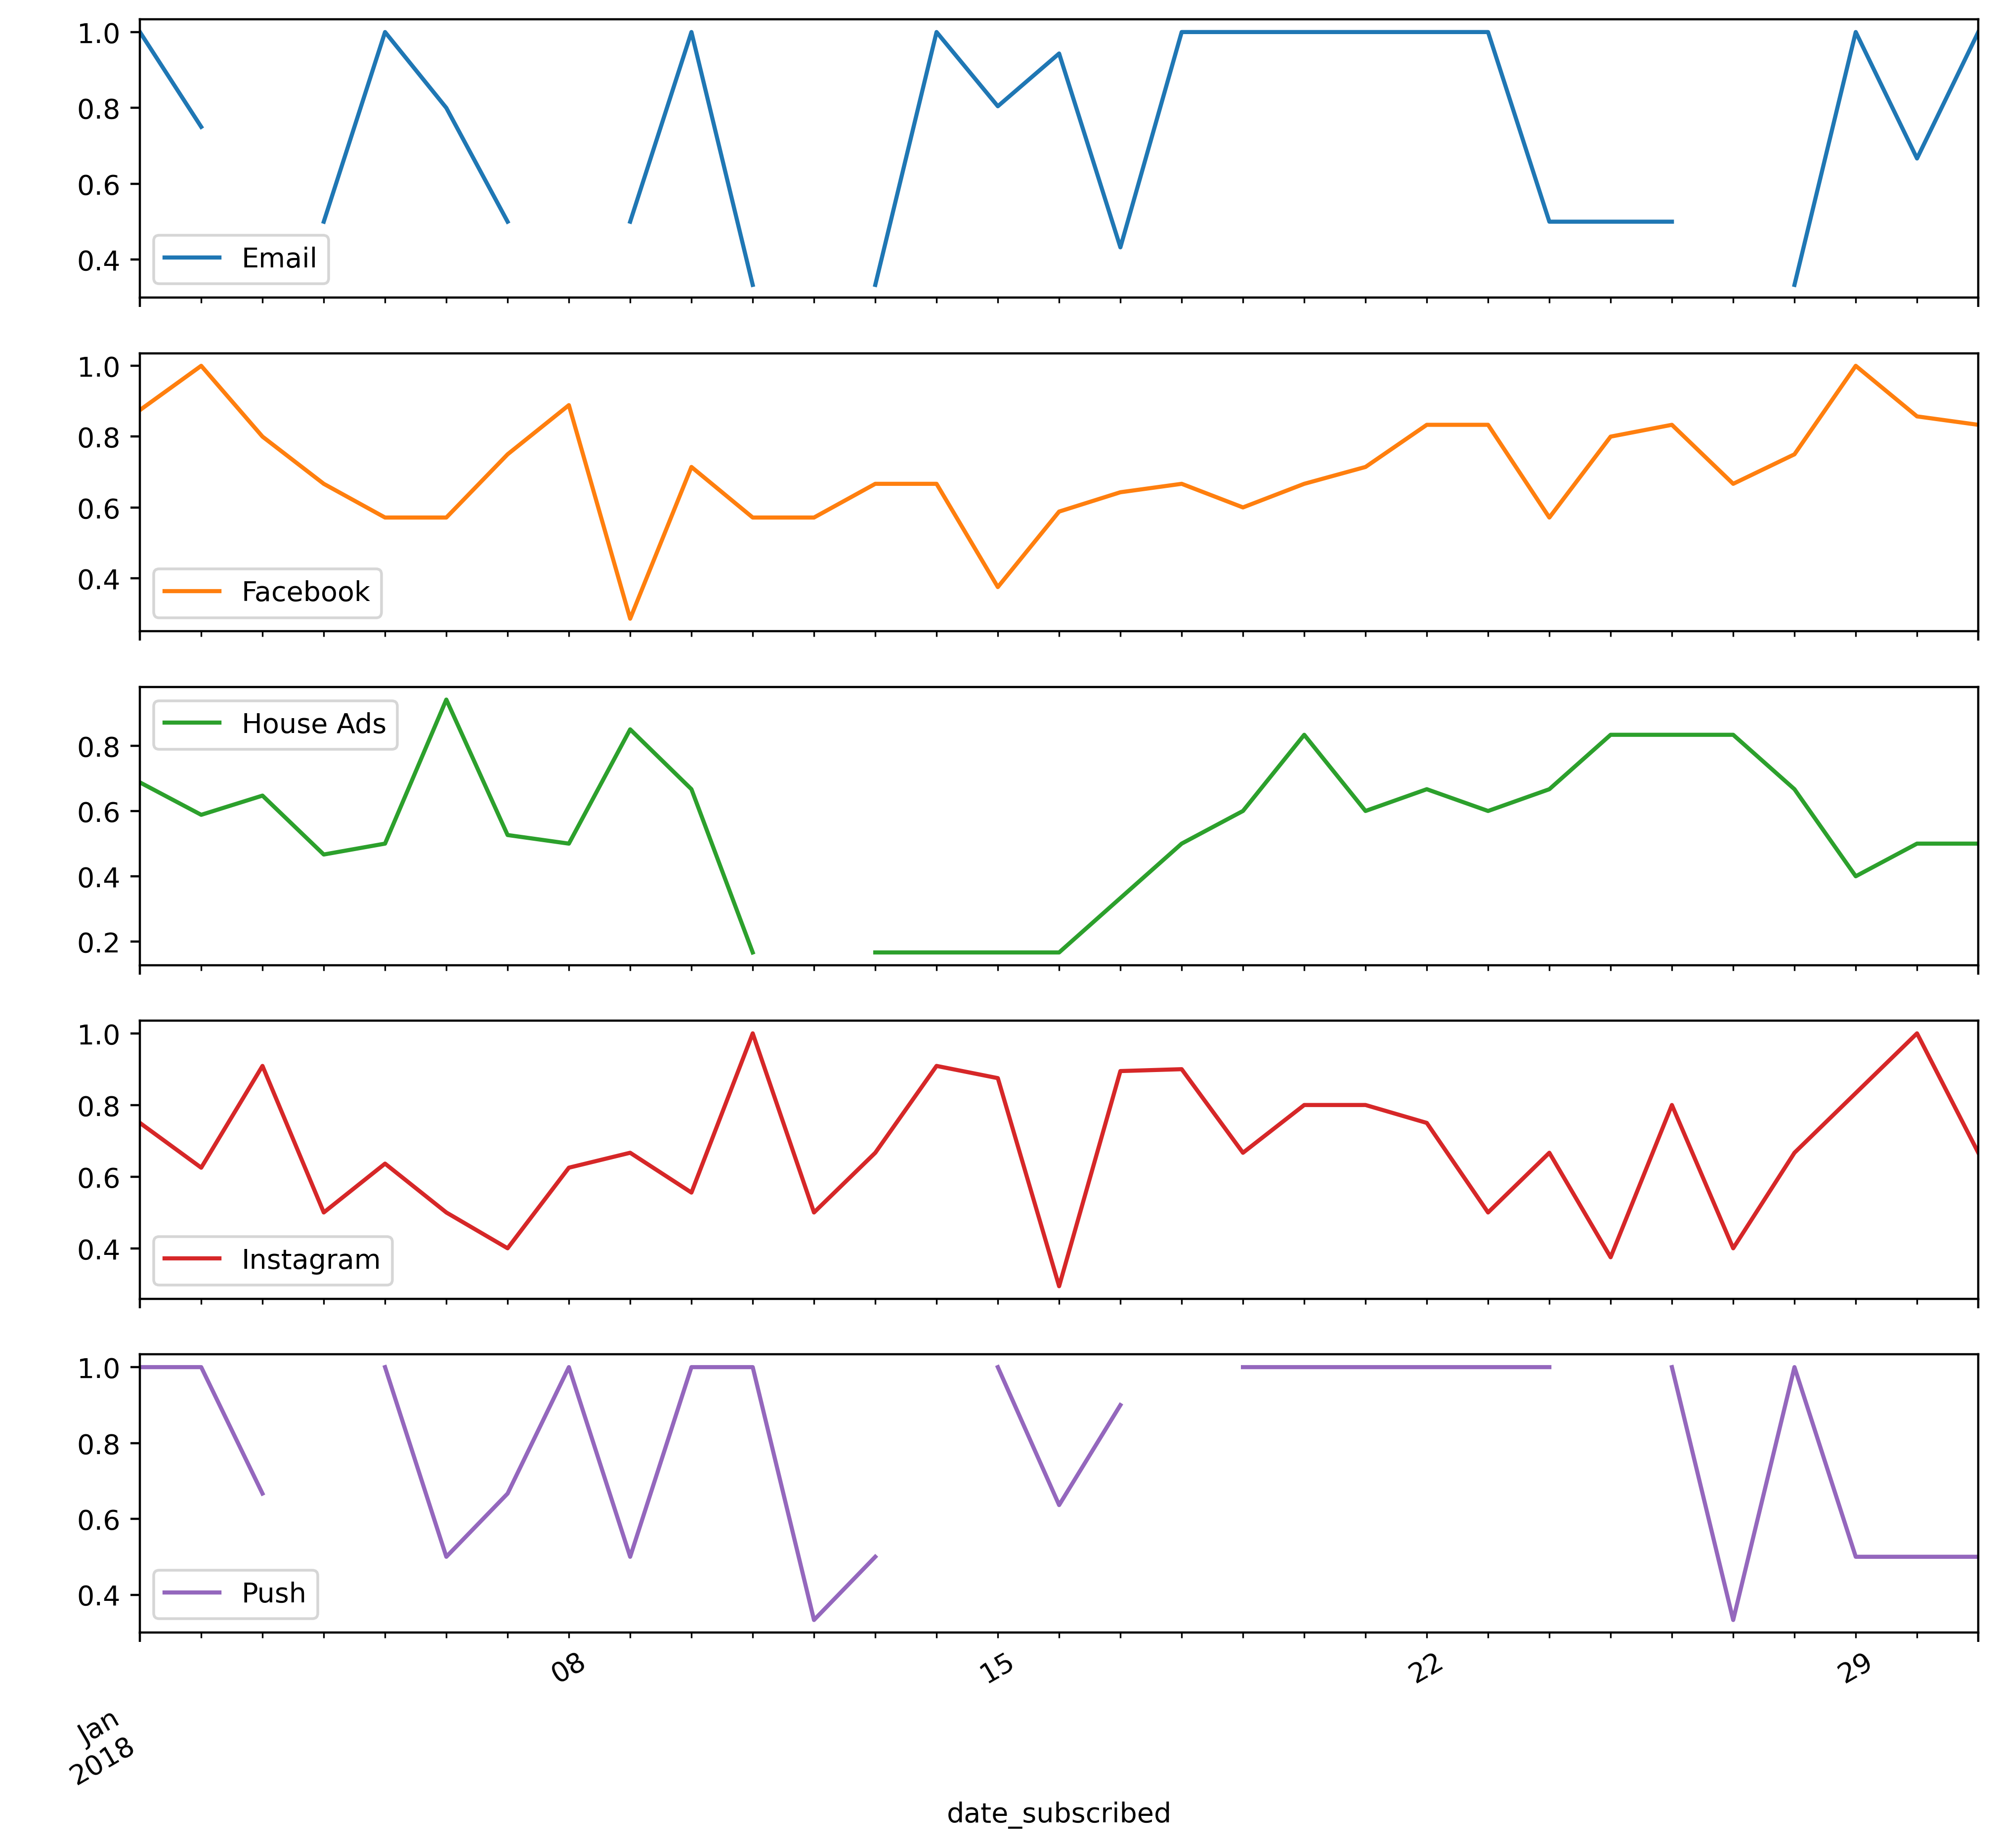

In [239]:
retention_rate_df.plot(subplots=True, figsize=(12, 12)); plt.legend(loc='best')